In [7]:
# import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import math
from skimage import data, segmentation, color
from skimage.future import graph
from sklearn.cluster import KMeans

In [8]:
class_trainingimgs = []

fileNames = glob.glob("/Users/tyler/ECSE 415/Final Project/flower_segmentation/images/*.jpg")

for i in fileNames:
    
    image = cv2.imread(i)
    class_trainingimgs.append(image)
    
#print(len(class_trainingimgs))

In [9]:
resizeSegmentation = []

for i in class_trainingimgs:

    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    scale = 50
    width = int(i.shape[1] * scale / 100)
    height = int(i.shape[0] * scale / 100)
    dim = (width, height)
    pic = cv2.resize(i, dim,interpolation=cv2.INTER_AREA)
    resizeSegmentation.append(pic)

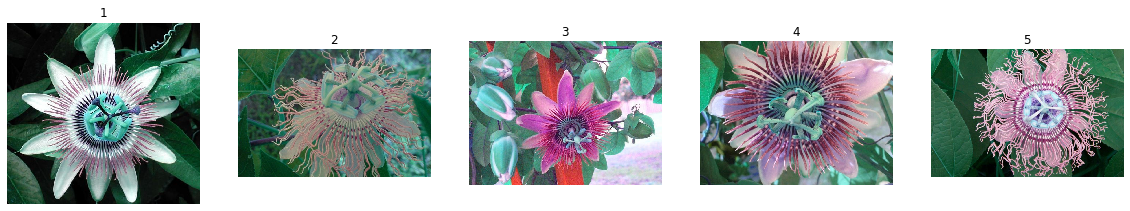

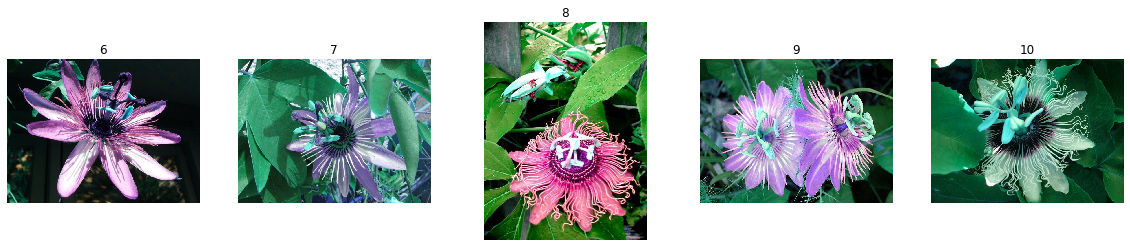

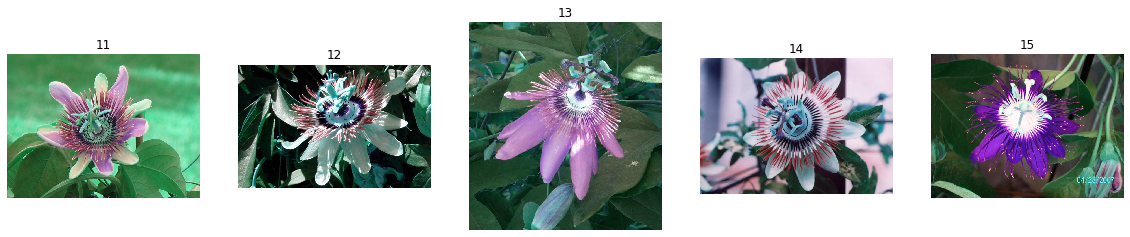

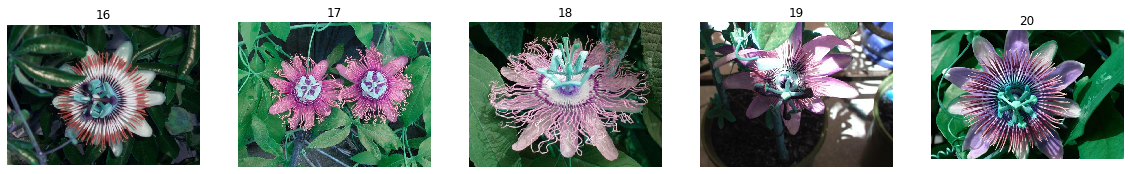

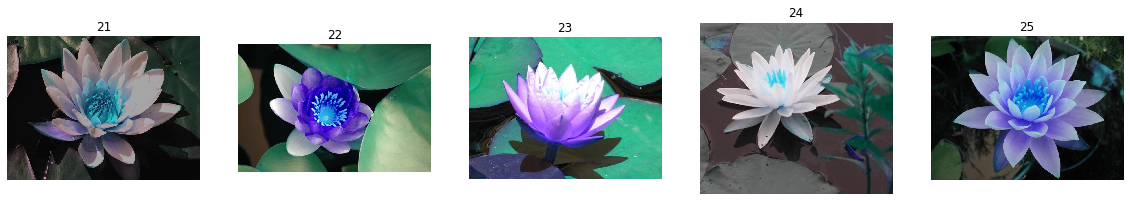

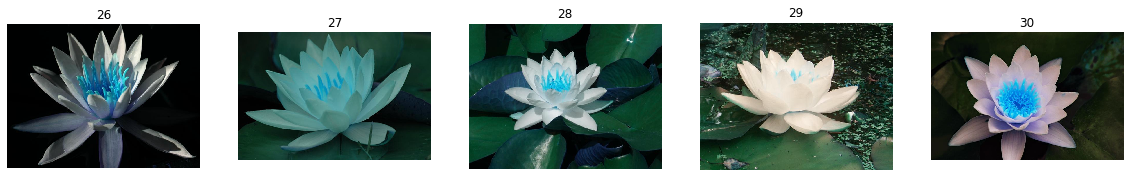

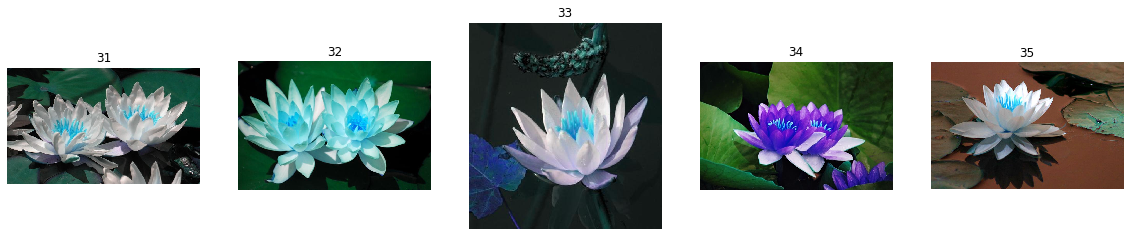

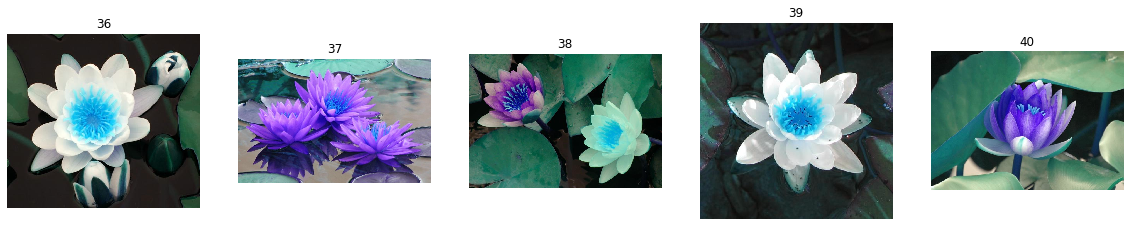

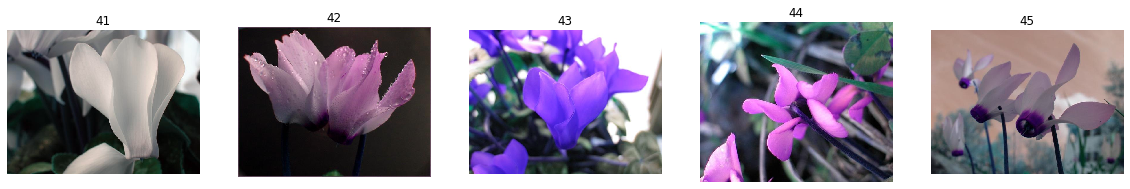

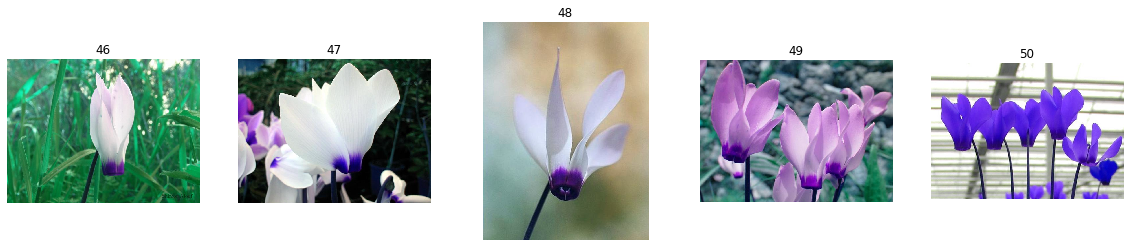

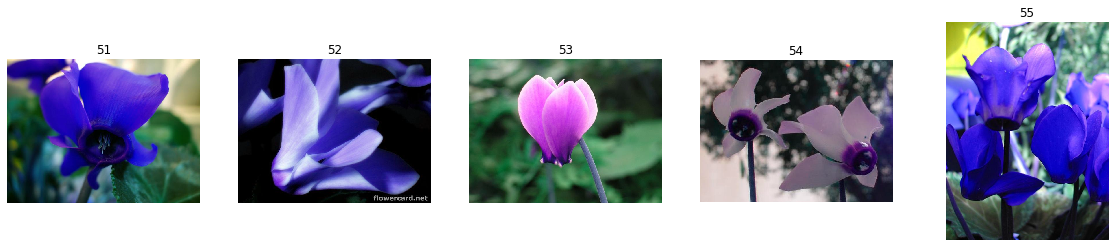

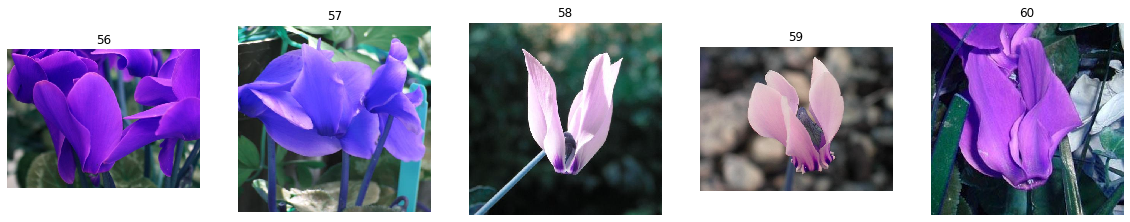

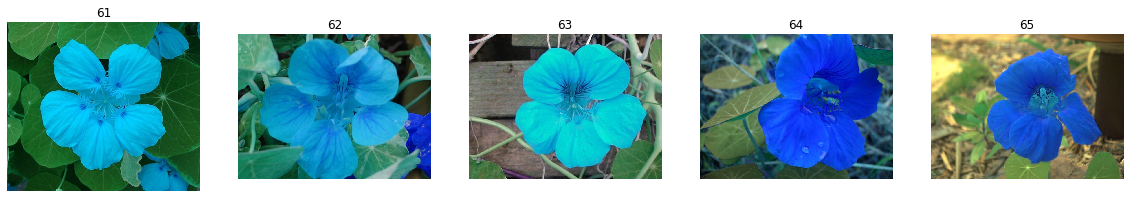

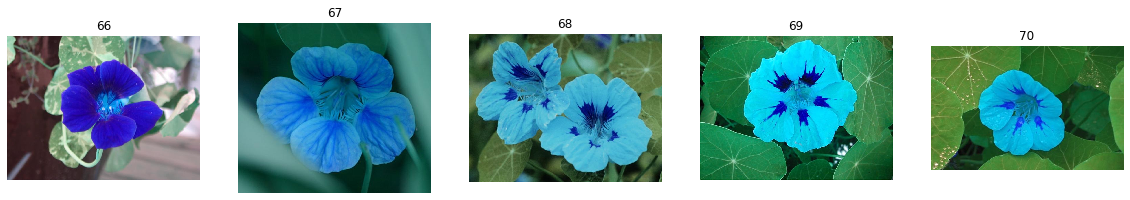

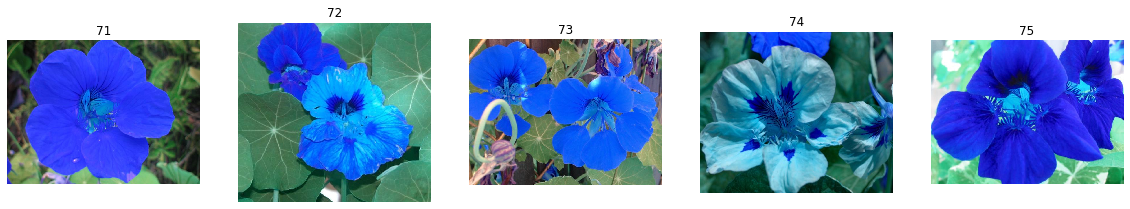

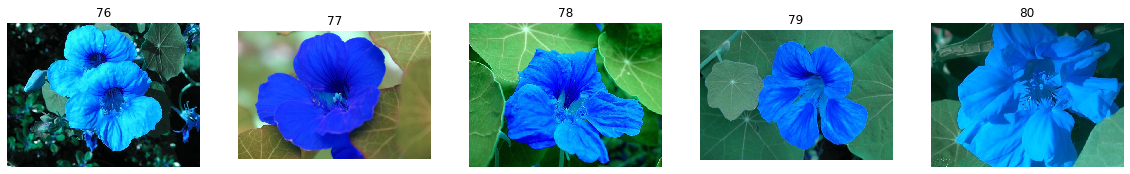

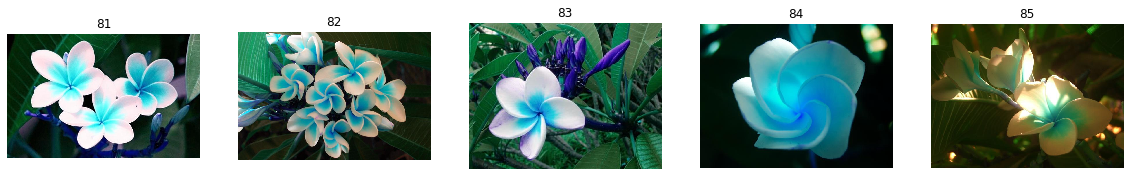

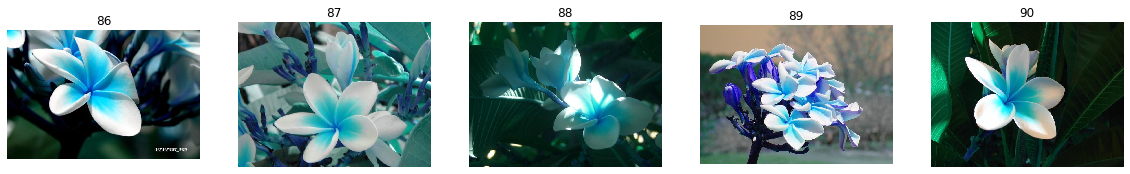

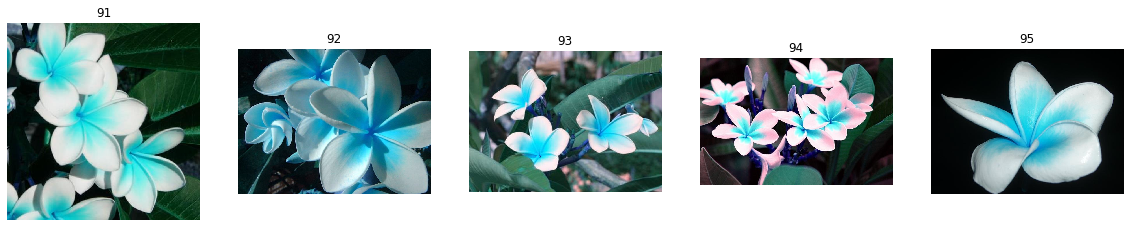

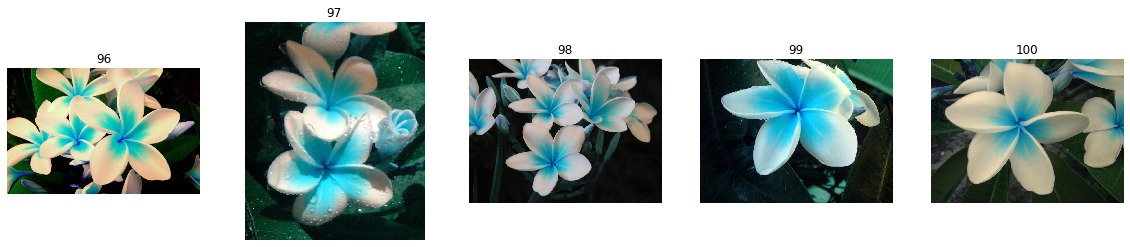

In [10]:
def plot(segImgs, titles=None, max_col=5): 
    
    n = len(segImgs)
    
    # Each plot can hold up to 8 images.
    rows_per_set = 8 // max_col 
    fig_per_set = rows_per_set * max_col
    sets = math.ceil(n / fig_per_set)
    
    for s in range(sets):
        
        # starting index of your set
        start = s * fig_per_set
        
        # compute the number of images and rows in the current set 
        subset_len = min(start+fig_per_set, n) - start
        nb_rows = math.ceil(subset_len / max_col)
        
        # set subplot map 
        subplot = "{}{}".format(nb_rows, max_col)
        plt.figure(figsize=(20, 4 * nb_rows))
        for i in range(subset_len):
            plt.subplot(int("{}{}".format(subplot, i+1)))
            if titles is not None: 
                plt.title(titles[start + i])
            else:
                plt.title(str(start + i + 1))
            plt.axis('off')
            plt.imshow(segImgs[start + i].astype(np.uint8))
    plt.show()

plot(class_trainingimgs)

In [76]:
def Kmeans(img):
    pic = img.copy()
    Z = pic.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1)
    K = 5
    ret,label,center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    out = center[label.flatten()]
    out = out.reshape((img.shape))
    colorList = [(0, 0, 0), (1, 1, 1)]
    
    labels = segmentation.slic(img, compactness=0.1, n_segments=2)
    out = color.label2rgb(labels, img, colors = colorList, alpha=1, kind='overlay')
    return labels

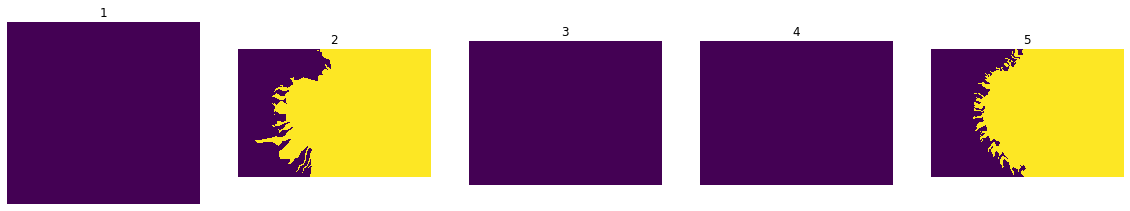

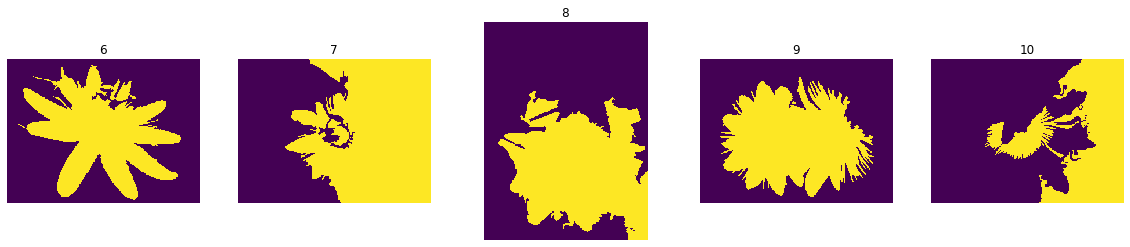

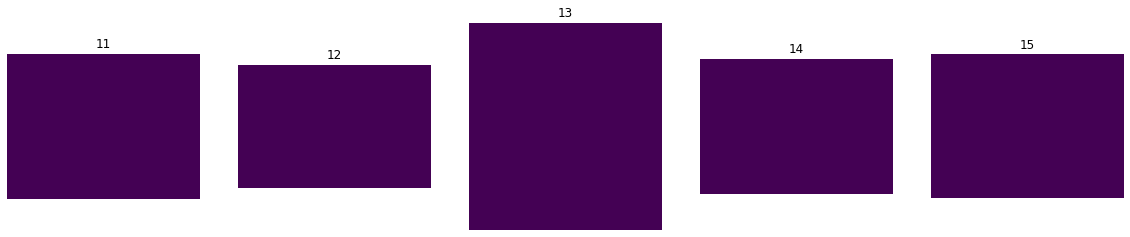

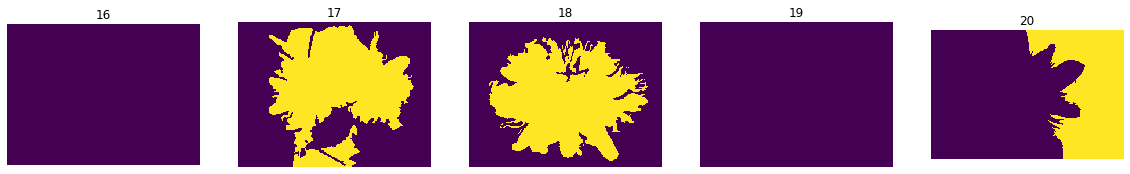

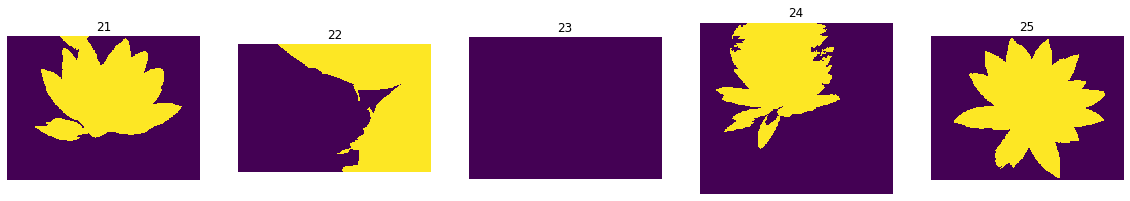

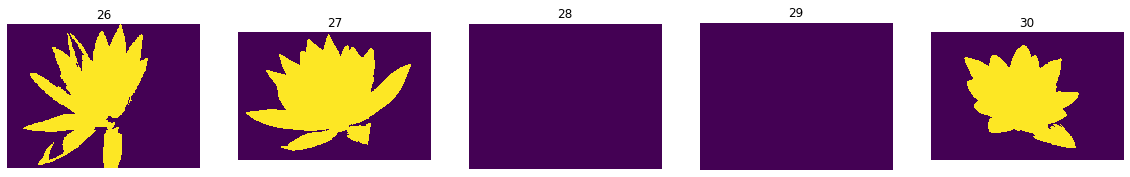

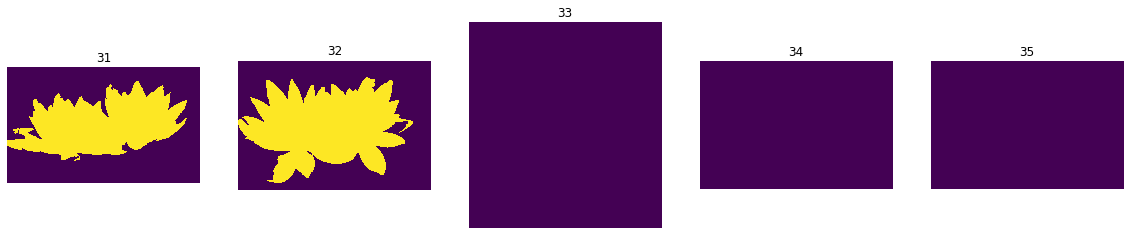

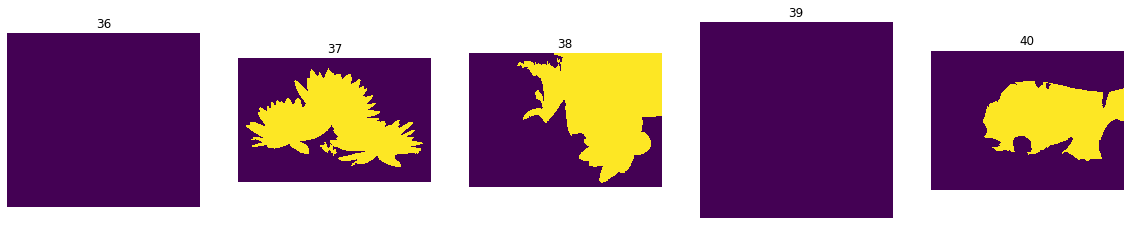

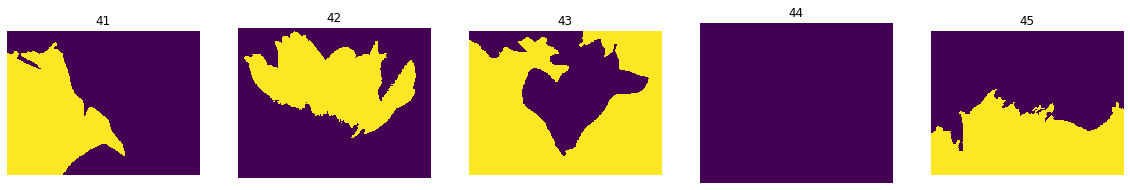

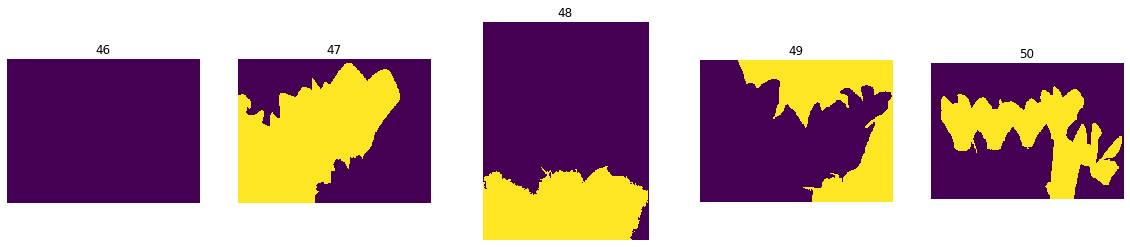

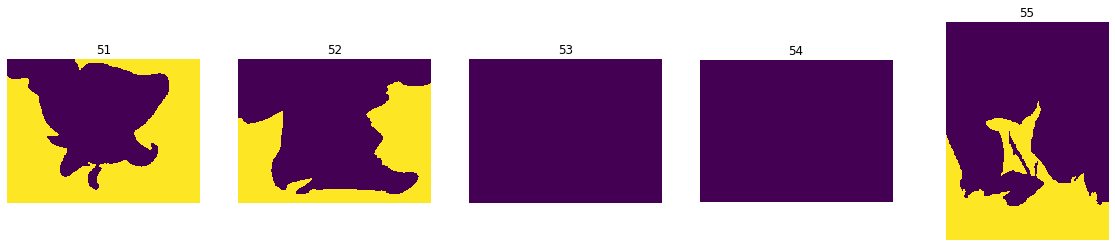

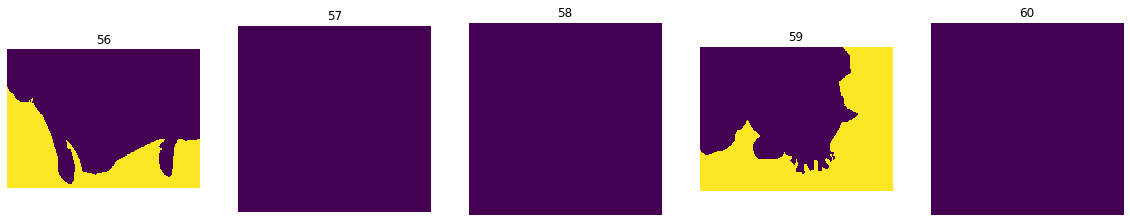

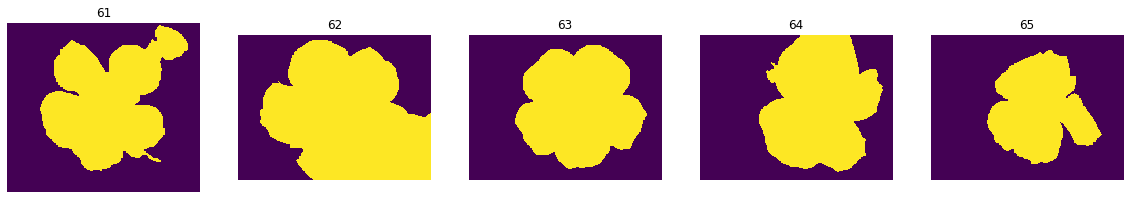

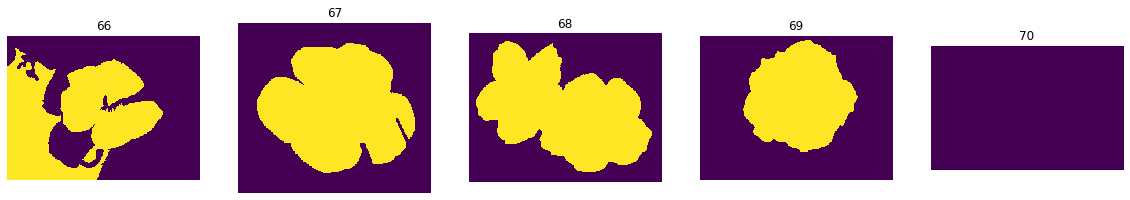

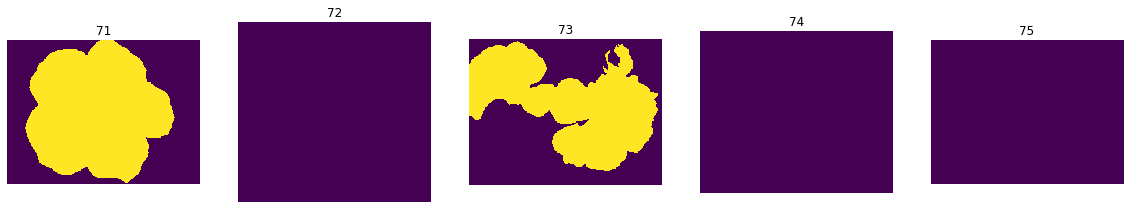

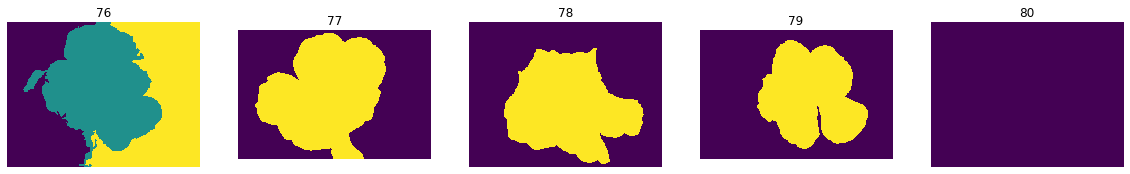

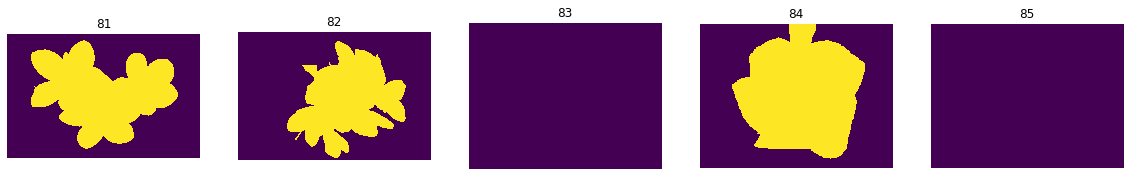

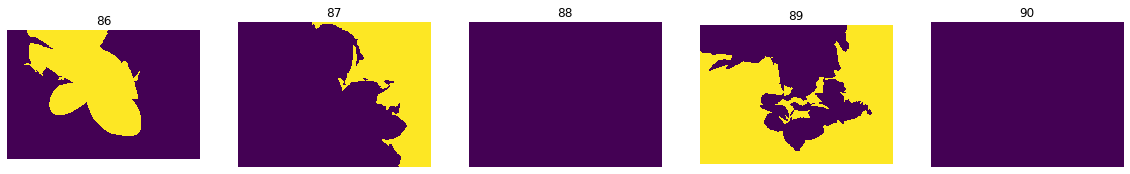

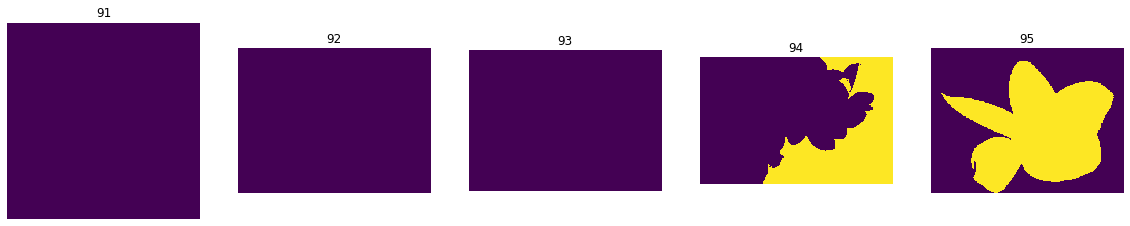

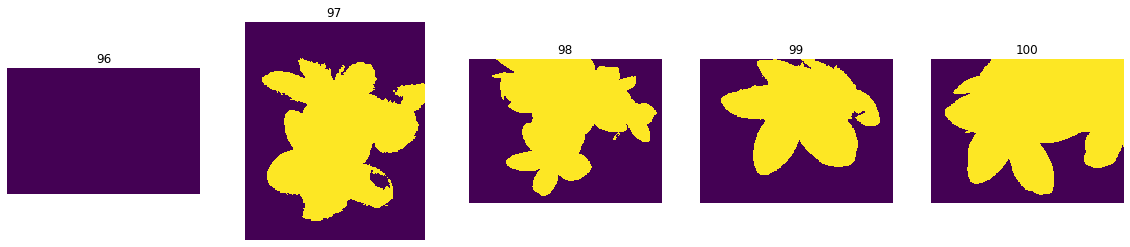

In [77]:
processed = []
for img in resizeSegmentation:
    output = Kmeans(img)
    # plt.imshow(output), plt.xticks([]), plt.yticks([])
    # plt.show()
    processed.append(output)

plot(processed)

In [ ]:
def Kmeans(img):
    Z = img.reshape((-1,3))

    # convert to np.float32
    Z = np.float32(Z)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 15, 1.0)
    K = 3
    ret,label,center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    #center = np.uint8(center)
    out = center[label.flatten()]
    #out = out.reshape((img.shape))
    #colorList = [(0, 0, 0), (1, 1, 1)]
    
    labels = segmentation.slic(img, compactness=0.1, n_segments=2)
    # out = color.label2rgb(labels, img, colors = colorList, alpha=1, kind='overlay')
    
    return labels